In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("/kaggle/input/electric-power-consumption/powerconsumption.csv")
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [3]:
df["Datetime"]

0           1/1/2017 0:00
1           1/1/2017 0:10
2           1/1/2017 0:20
3           1/1/2017 0:30
4           1/1/2017 0:40
               ...       
52411    12/30/2017 23:10
52412    12/30/2017 23:20
52413    12/30/2017 23:30
52414    12/30/2017 23:40
52415    12/30/2017 23:50
Name: Datetime, Length: 52416, dtype: object

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
df.drop(columns=["Datetime"],inplace = True)

In [7]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


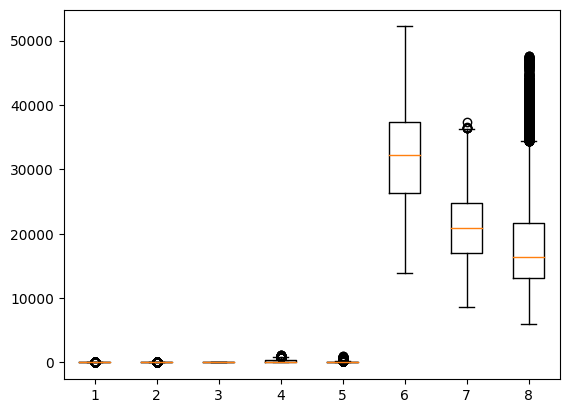

In [8]:
plt.boxplot(df)
plt.show()

In [9]:
X= df.drop(columns=['PowerConsumption_Zone1',"PowerConsumption_Zone2","PowerConsumption_Zone3"])


In [10]:
X

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,6.559,73.8,0.083,0.051,0.119
1,6.414,74.5,0.083,0.070,0.085
2,6.313,74.5,0.080,0.062,0.100
3,6.121,75.0,0.083,0.091,0.096
4,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096
52412,6.947,72.6,0.082,0.051,0.093
52413,6.900,72.8,0.086,0.084,0.074
52414,6.758,73.0,0.080,0.066,0.089


In [11]:
y = pd.Series(df['PowerConsumption_Zone1'] + df['PowerConsumption_Zone2'] + df['PowerConsumption_Zone3'])

In [12]:
y

0        70425.53544
1        69320.84387
2        67803.22193
3        65489.23209
4        63650.44627
            ...     
52411    72798.08659
52412    70983.80786
52413    68675.04965
52414    67163.01682
52415    65750.53976
Length: 52416, dtype: float64

In [13]:
scaler =MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)
x_scaled

,0,1,2,3,4
0,0.090091,0.748382,0.005130,0.000040,0.000115
1,0.086146,0.756770,0.005130,0.000057,0.000079
2,0.083399,0.756770,0.004663,0.000050,0.000095
3,0.078176,0.762761,0.005130,0.000075,0.000091
4,0.072736,0.771148,0.004819,0.000038,0.000079
...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091
52412,0.100645,0.734004,0.004974,0.000040,0.000088
52413,0.099366,0.736401,0.005596,0.000069,0.000067
52414,0.095504,0.738797,0.004663,0.000053,0.000083


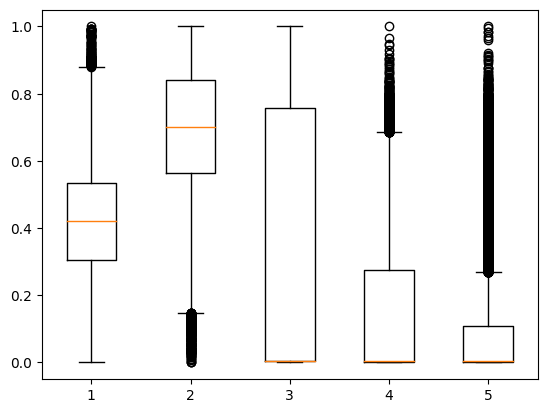

In [14]:
plt.boxplot(x_scaled)
plt.show()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42,test_size=0.2)
x_train

,0,1,2,3,4
26890,0.732340,0.487539,0.757967,0.371537,0.117938
36038,0.438566,0.949676,0.039950,0.000059,0.000127
27335,0.726899,0.271268,0.756412,0.060788,0.077446
9666,0.247341,0.886173,0.004042,0.000044,0.000162
1977,0.404020,0.612030,0.006062,0.063453,0.088985
...,...,...,...,...,...
11284,0.196747,0.941289,0.004974,0.036617,0.042692
44732,0.499225,0.624251,0.004042,0.353222,0.451169
38158,0.536763,0.463815,0.757345,0.000072,0.000095
860,0.248157,0.779535,0.005441,0.000044,0.000115


In [16]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred= model.predict(x_test)
y_pred

array([76958.98537169, 70754.03016655, 66097.72299167, ...,
       73220.46843351, 84541.99790755, 79306.18037899])

In [18]:
r2= r2_score(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
print(r2,mse)

0.2673950073071425 213680443.38278624


In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
iso = IsolationForest(contamination=0.075,random_state=42)
iso.fit_predict(x_scaled)

array([1, 1, 1, ..., 1, 1, 1])

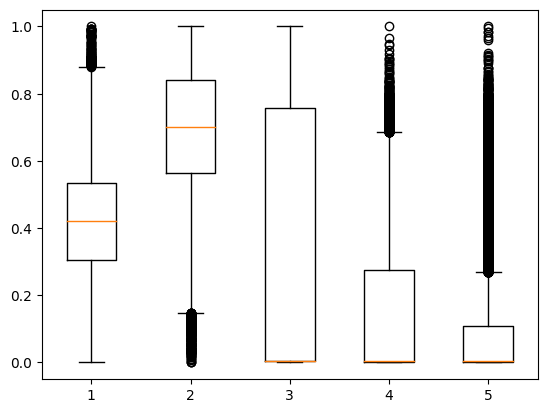

In [21]:
plt.boxplot(x_scaled)
plt.show()

In [22]:
model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred= model_xgb.predict(x_test)
y_pred

array([66473.37 , 84793.055, 64992.445, ..., 64960.246, 65605.27 ,
       90019.13 ], dtype=float32)

In [24]:
r2= r2_score(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
print(r2,mse)

0.5576611968207276 129017891.67629221


In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

def evaluate_regression_models(X_train, X_test, y_train, y_test):
    # Initialize models with default parameters
    models = {
        'RandomForest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'CatBoost': CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress CatBoost output
    }
    
    # Dictionary to store results
    results = {
        'Model': [],
        'MSE': [],
        'R2': []
    }
    
    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results['Model'].append(model_name)
        results['MSE'].append(mse)
        results['R2'].append(r2)
    
    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results)
    
    return results_df


In [26]:
evaluate_regression_models(x_train,x_test,y_train,y_test)

,Model,MSE,R2
0,RandomForest,1.071701e+08,0.632567
1,XGBoost,1.290179e+08,0.557661
2,CatBoost,1.312356e+08,0.550058


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def enhance_features(X_scaled, poly_degree=2, include_transforms=True):

    # Convert to DataFrame if input is numpy array
    if isinstance(X_scaled, np.ndarray):
        X_scaled = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(X_scaled.shape[1])])
    
    # Ensure column names are strings to avoid TypeError in PolynomialFeatures
    X_scaled = X_scaled.copy()  # Avoid modifying the input
    X_scaled.columns = [f'feature_{i}' if isinstance(col, (int, float)) else col for i, col in enumerate(X_scaled.columns)]
    
    # Initialize list to store new feature DataFrames
    new_features = [X_scaled]
    
    # 1. Polynomial Features (squares, interactions)
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    poly_features = poly.fit_transform(X_scaled)
    poly_feature_names = poly.get_feature_names_out(X_scaled.columns)
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=X_scaled.index)
    new_features.append(poly_df)
    
    # 2. Mathematical Transformations (if enabled)
    if include_transforms:
        for col in X_scaled.columns:
            # Log transformation (avoid log(0) or negative values)
            if (X_scaled[col] > 0).all():
                new_features.append(pd.DataFrame({f'{col}_log': np.log(X_scaled[col])}, index=X_scaled.index))
            
            # Square root transformation (for non-negative values)
            if (X_scaled[col] >= 0).all():
                new_features.append(pd.DataFrame({f'{col}_sqrt': np.sqrt(X_scaled[col])}, index=X_scaled.index))
            
            # Reciprocal transformation (avoid division by zero)
            if (X_scaled[col] != 0).all():
                new_features.append(pd.DataFrame({f'{col}_reciprocal': 1 / X_scaled[col]}, index=X_scaled.index))
    
    # Concatenate all new features
    enhanced_df = pd.concat(new_features, axis=1)
    
    # Remove any duplicate columns (if any)
    enhanced_df = enhanced_df.loc[:, ~enhanced_df.columns.duplicated()]
    
    # Handle any missing or infinite values
    enhanced_df = enhanced_df.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    return enhanced_df


In [28]:
z = enhance_features(x_scaled, poly_degree=2, include_transforms=True)

In [29]:
z

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_0^2,feature_0 feature_1,feature_0 feature_2,feature_0 feature_3,feature_0 feature_4,...,feature_2 feature_3,feature_2 feature_4,feature_3^2,feature_3 feature_4,feature_4^2,feature_0_sqrt,feature_1_sqrt,feature_2_sqrt,feature_3_sqrt,feature_4_sqrt
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.008116,0.067422,0.000462,0.000004,0.000010,...,2.073099e-07,5.919069e-07,1.633200e-09,4.663078e-09,1.331392e-08,0.300151,0.865091,0.071623,0.006357,0.010742
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.007421,0.065193,0.000442,0.000005,0.000007,...,2.911160e-07,4.055658e-07,3.220560e-09,4.486696e-09,6.250603e-09,0.293507,0.869925,0.071623,0.007533,0.008892
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.006955,0.063114,0.000389,0.000004,0.000008,...,2.325720e-07,4.434319e-07,2.487136e-09,4.742082e-09,9.041459e-09,0.288789,0.869925,0.068289,0.007062,0.009751
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.006112,0.059630,0.000401,0.000006,0.000007,...,3.837438e-07,4.658526e-07,5.596056e-09,6.793432e-09,8.247007e-09,0.279600,0.873362,0.071623,0.008649,0.009530
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.005291,0.056090,0.000351,0.000003,0.000006,...,1.823151e-07,3.809861e-07,1.431360e-09,2.991131e-09,6.250603e-09,0.269696,0.878150,0.069418,0.006151,0.008892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.010477,0.074886,0.000477,0.000003,0.000009,...,1.443551e-07,4.235024e-07,9.581832e-10,2.811075e-09,8.247007e-09,0.319935,0.855341,0.068289,0.005564,0.009530
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.010129,0.073874,0.000501,0.000004,0.000009,...,2.010278e-07,4.357923e-07,1.633200e-09,3.540485e-09,7.675138e-09,0.317245,0.856741,0.070529,0.006357,0.009360
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.009874,0.073173,0.000556,0.000007,0.000007,...,3.849468e-07,3.766680e-07,4.731769e-09,4.630006e-09,4.530432e-09,0.315224,0.858138,0.074807,0.008294,0.008204
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.009121,0.070558,0.000445,0.000005,0.000008,...,2.486115e-07,3.886257e-07,2.842019e-09,4.442601e-09,6.944608e-09,0.309037,0.859533,0.068289,0.007301,0.009129


In [30]:
x_train,x_test,y_train,y_test=train_test_split(z,y,random_state=42,test_size=0.2)
evaluate_regression_models(x_train,x_test,y_train,y_test)

,Model,MSE,R2
0,RandomForest,1.055889e+08,0.637988
1,XGBoost,1.292941e+08,0.556714
2,CatBoost,1.269956e+08,0.564595


In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

def select_features(enhanced_X, y, k=10, corr_threshold=0.8):

    # Ensure inputs are in correct format
    enhanced_X = enhanced_X.copy()  # Avoid modifying input
    if isinstance(y, np.ndarray):
        y = pd.Series(y, name='target')
    
    # Step 1: Remove highly correlated features
    corr_matrix = enhanced_X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    enhanced_X = enhanced_X.drop(columns=to_drop)
    print(f"Removed {len(to_drop)} highly correlated features (threshold={corr_threshold})")
    
    # Step 2: Univariate feature selection with SelectKBest
    selector = SelectKBest(score_func=f_regression, k=min(k, enhanced_X.shape[1]))
    selector.fit(enhanced_X, y)
    selected_indices = selector.get_support(indices=True)
    kbest_features = enhanced_X.columns[selected_indices].tolist()
    print(f"Selected {len(kbest_features)} features via SelectKBest: {kbest_features}")
    
    # Step 3: Model-based feature selection with Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=100)
    rf.fit(enhanced_X, y)
    importances = pd.Series(rf.feature_importances_, index=enhanced_X.columns)
    rf_features = importances.nlargest(k).index.tolist()
    print(f"Top {len(rf_features)} features by Random Forest importance: {rf_features}")
    
    # Combine selected features (union of SelectKBest and Random Forest)
    selected_features = list(set(kbest_features).union(set(rf_features)))
    print(f"Total selected features: {len(selected_features)}")
    
    # Return reduced DataFrame
    reduced_X = enhanced_X[selected_features]
    
    return reduced_X

In [32]:
v = select_features(z, y, k=10, corr_threshold=0.8)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Removed 17 highly correlated features (threshold=0.8)
Selected 8 features via SelectKBest: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_0 feature_1', 'feature_2 feature_3', 'feature_2 feature_4']
Top 8 features by Random Forest importance: ['feature_0', 'feature_0 feature_1', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_2 feature_3', 'feature_2 feature_4']
Total selected features: 8


In [33]:
v

,feature_2 feature_3,feature_2,feature_0 feature_1,feature_4,feature_3,feature_2 feature_4,feature_0,feature_1
0,2.073099e-07,0.005130,0.067422,0.000115,0.000040,5.919069e-07,0.090091,0.748382
1,2.911160e-07,0.005130,0.065193,0.000079,0.000057,4.055658e-07,0.086146,0.756770
2,2.325720e-07,0.004663,0.063114,0.000095,0.000050,4.434319e-07,0.083399,0.756770
3,3.837438e-07,0.005130,0.059630,0.000091,0.000075,4.658526e-07,0.078176,0.762761
4,1.823151e-07,0.004819,0.056090,0.000079,0.000038,3.809861e-07,0.072736,0.771148
...,...,...,...,...,...,...,...,...
52411,1.443551e-07,0.004663,0.074886,0.000091,0.000031,4.235024e-07,0.102358,0.731608
52412,2.010278e-07,0.004974,0.073874,0.000088,0.000040,4.357923e-07,0.100645,0.734004
52413,3.849468e-07,0.005596,0.073173,0.000067,0.000069,3.766680e-07,0.099366,0.736401
52414,2.486115e-07,0.004663,0.070558,0.000083,0.000053,3.886257e-07,0.095504,0.738797


In [34]:
x_train,x_test,y_train,y_test=train_test_split(v,y,random_state=42,test_size=0.2)
evaluate_regression_models(x_train,x_test,y_train,y_test)

,Model,MSE,R2
0,RandomForest,1.011111e+08,0.653340
1,XGBoost,1.276834e+08,0.562236
2,CatBoost,1.272390e+08,0.563760


In [35]:
df = pd.read_csv("/kaggle/input/electric-power-consumption/powerconsumption.csv")

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def process_datetime_features(q):
    # Ensure input is a copy to avoid modifying original
    q = q.copy()
    
    # Convert Datetime column to datetime type
    q['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')
    
    # Extract day, month, year, and hour as floats
    q['day'] = q['Datetime'].dt.day.astype(float)
    q['month'] = q['Datetime'].dt.month.astype(float)
    q['hour'] = q['Datetime'].dt.hour.astype(float)
    
    # Standardize the new datetime features
    scaler = StandardScaler()
    datetime_features = ['day', 'month', 'hour']
    q[datetime_features] = scaler.fit_transform(q[datetime_features])
    
    # Drop the original Datetime column (optional, comment out if you want to keep it)
    # q = q.drop(columns=['Datetime'])
    
    print(f"Added and standardized columns: {datetime_features}")
    print(f"New DataFrame shape: {q.shape}")
    
    return q


In [37]:
v=process_datetime_features(v)

Added and standardized columns: ['day', 'month', 'hour']
New DataFrame shape: (52416, 12)


In [38]:
v.drop(columns="Datetime",inplace=True)

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

def advanced_feature_engineering(cleaned_X, y, n_pca_components=2, n_clusters=3):

    # Ensure inputs are in correct format
    cleaned_X = cleaned_X.copy()  # Avoid modifying input
    if isinstance(y, np.ndarray):
        y = pd.Series(y, name='target', index=cleaned_X.index)
    elif isinstance(y, pd.Series):
        y = y.copy().reindex(cleaned_X.index)  # Ensure index alignment
    
    # Initialize list to store new features
    new_features = [cleaned_X]
    
    # Step 1: Custom Interaction Features (ratios of top features)
    # Use Random Forest to identify top 2 important features
    rf = RandomForestRegressor(random_state=42, n_estimators=50)
    rf.fit(cleaned_X, y)
    importances = pd.Series(rf.feature_importances_, index=cleaned_X.columns)
    top_features = importances.nlargest(2).index
    print(f"Top 2 features for interactions: {top_features}")
    
    # Create ratio feature if denominator is not zero
    if (cleaned_X[top_features[1]] != 0).all():
        ratio_name = f"{top_features[0]}_div_{top_features[1]}"
        new_features.append(pd.DataFrame(
            {ratio_name: cleaned_X[top_features[0]] / cleaned_X[top_features[1]]},
            index=cleaned_X.index
        ))
        print(f"Added ratio feature: {ratio_name}")
    
    # Step 2: PCA Features
    pca = PCA(n_components=min(n_pca_components, cleaned_X.shape[1]), random_state=42)
    pca_features = pca.fit_transform(cleaned_X)
    pca_columns = [f'PCA_{i+1}' for i in range(pca_features.shape[1])]
    pca_df = pd.DataFrame(pca_features, columns=pca_columns, index=cleaned_X.index)
    new_features.append(pca_df)
    print(f"Added {len(pca_columns)} PCA features")
    
    # Step 3: Clustering Features
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(cleaned_X)
    cluster_df = pd.DataFrame({'cluster': cluster_labels}, index=cleaned_X.index)
    new_features.append(cluster_df)
    print(f"Added cluster feature with {n_clusters} clusters")
    
    # Concatenate all features
    enhanced_X = pd.concat(new_features, axis=1)
    
    # Remove duplicate columns (if any)
    enhanced_X = enhanced_X.loc[:, ~enhanced_X.columns.duplicated()]
    
    # Handle missing or infinite values
    enhanced_X = enhanced_X.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Step 4: Re-scale features
    scaler = StandardScaler()
    enhanced_X_scaled = pd.DataFrame(
        scaler.fit_transform(enhanced_X),
        columns=enhanced_X.columns,
        index=enhanced_X.index
    )
    
    print(f"Original shape: {cleaned_X.shape}, Enhanced shape: {enhanced_X_scaled.shape}")
    
    return enhanced_X_scaled


In [40]:
i = advanced_feature_engineering(v, y, n_pca_components=2, n_clusters=3)

Top 2 features for interactions: Index(['hour', 'feature_0'], dtype='object')
Added 2 PCA features
Added cluster feature with 3 clusters
Original shape: (52416, 11), Enhanced shape: (52416, 14)


In [41]:
x_train,x_test,y_train,y_test=train_test_split(i,y,random_state=42,test_size=0.2)
evaluate_regression_models(x_train,x_test,y_train,y_test)

,Model,MSE,R2
0,RandomForest,4.081218e+06,0.986008
1,XGBoost,6.129238e+06,0.978986
2,CatBoost,6.174697e+06,0.978830


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def augment_data_no_smote(further_enhanced_X, cleaned_y, n_synthetic_samples=None, perturbation_scale=0.1, bootstrap_ratio=0.5):

    # Ensure inputs are in correct format
    further_enhanced_X = further_enhanced_X.copy()  # Avoid modifying input
    if isinstance(cleaned_y, np.ndarray):
        cleaned_y = pd.Series(cleaned_y, name='target', index=further_enhanced_X.index)
    elif isinstance(cleaned_y, pd.Series):
        cleaned_y = cleaned_y.copy().reindex(further_enhanced_X.index)  # Ensure index alignment
    
    # Set default number of synthetic samples (double the dataset size if not specified)
    if n_synthetic_samples is None:
        n_synthetic_samples = further_enhanced_X.shape[0]
    
    # Calculate number of samples for bootstrap and perturbation
    n_bootstrap = int(n_synthetic_samples * bootstrap_ratio)
    n_perturb = n_synthetic_samples - n_bootstrap
    
    # Initialize lists to store augmented data
    augmented_X_list = [further_enhanced_X]
    augmented_y_list = [cleaned_y]
    
    # Step 1: Bootstrap Sampling
    if n_bootstrap > 0:
        # Randomly sample indices with replacement
        indices = np.random.choice(further_enhanced_X.index, size=n_bootstrap, replace=True)
        bootstrap_X = further_enhanced_X.loc[indices].copy()
        bootstrap_y = cleaned_y.loc[indices].copy()
        augmented_X_list.append(bootstrap_X)
        augmented_y_list.append(bootstrap_y)
        print(f"Generated {n_bootstrap} synthetic samples using bootstrap sampling")
    
    # Step 2: Random Perturbation
    if n_perturb > 0:
        # Randomly sample indices to perturb
        indices = np.random.choice(further_enhanced_X.index, size=n_perturb, replace=True)
        perturb_X = further_enhanced_X.loc[indices].copy()
        perturb_y = cleaned_y.loc[indices].copy()
        
        # Add random noise to features
        for col in perturb_X.columns:
            noise = np.random.normal(0, perturbation_scale * perturb_X[col].std(), size=n_perturb)
            perturb_X[col] += noise
        
        # Add noise to target
        noise_y = np.random.normal(0, perturbation_scale * cleaned_y.std(), size=n_perturb)
        perturb_y += noise_y
        
        augmented_X_list.append(perturb_X)
        augmented_y_list.append(perturb_y)
        print(f"Generated {n_perturb} synthetic samples using random perturbation")
    
    # Concatenate all data
    augmented_X = pd.concat(augmented_X_list, axis=0, ignore_index=True)
    augmented_y = pd.concat(augmented_y_list, axis=0, ignore_index=True)
    
    # Handle missing or infinite values
    augmented_X = augmented_X.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Re-scale features
    scaler = StandardScaler()
    augmented_X = pd.DataFrame(
        scaler.fit_transform(augmented_X),
        columns=augmented_X.columns,
        index=augmented_X.index
    )
    
    print(f"Original shape: {further_enhanced_X.shape}, Augmented shape: {augmented_X.shape}")
    
    return augmented_X, augmented_y

In [43]:
q,p= augment_data_no_smote(v, y, n_synthetic_samples=None, perturbation_scale=0.1, bootstrap_ratio=0.5)

Generated 26208 synthetic samples using bootstrap sampling
Generated 26208 synthetic samples using random perturbation
Original shape: (52416, 11), Augmented shape: (104832, 11)


In [44]:
q

,feature_2 feature_3,feature_2,feature_0 feature_1,feature_4,feature_3,feature_2 feature_4,feature_0,feature_1,day,month,hour
0,-0.418554,-0.799462,-1.928558,-0.602782,-0.691098,-0.369376,-2.101930,0.355890,-1.667244,-1.603562,-1.657591
1,-0.418554,-0.799462,-1.949255,-0.603056,-0.691026,-0.369379,-2.126803,0.400759,-1.667244,-1.603562,-1.657591
2,-0.418554,-0.800736,-1.968558,-0.602935,-0.691057,-0.369378,-2.144129,0.400759,-1.667244,-1.603562,-1.657591
3,-0.418553,-0.799462,-2.000905,-0.602968,-0.690947,-0.369378,-2.177064,0.432808,-1.667244,-1.603562,-1.657591
4,-0.418555,-0.800311,-2.033768,-0.603056,-0.691109,-0.369379,-2.211372,0.477677,-1.667244,-1.603562,-1.657591
...,...,...,...,...,...,...,...,...,...,...,...
104827,-0.341415,-0.814888,-0.283825,-0.529085,-0.677350,-0.304206,-0.799077,0.915833,0.777083,1.457164,1.308561
104828,-0.385193,-0.769362,-0.844557,2.110506,0.476264,-0.239763,-0.428941,-0.379613,1.263798,-1.276202,0.712466
104829,-0.581014,1.278604,-2.083994,-0.832028,-0.702253,-0.326249,-2.284032,1.151068,0.867407,1.146901,-0.823697
104830,-0.474733,-0.620689,-0.416523,1.296907,0.153247,-0.351840,-0.264607,-0.337892,-0.150221,-1.103361,0.858719


In [45]:
x_train,x_test,y_train,y_test=train_test_split(q,p,random_state=42,test_size=0.2)
evaluate_regression_models(x_train,x_test,y_train,y_test)

,Model,MSE,R2
0,RandomForest,7.883698e+06,0.972660
1,XGBoost,1.165802e+07,0.959570
2,CatBoost,1.123063e+07,0.961053
